In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('CARS_1.csv')

In [3]:
print(df.isnull().sum())

car_name               0
fuel_type              0
transmission_type      0
reviews_count          0
engine_displacement    0
no_cylinder            0
seating_capacity       0
fuel_tank_capacity     2
price                  3
horse_power            0
dtype: int64


In [4]:
df.fillna(df.mean(numeric_only=True), inplace=True)

In [5]:
df.head()

,car_name,fuel_type,transmission_type,reviews_count,engine_displacement,no_cylinder,seating_capacity,fuel_tank_capacity,price,horse_power
0,Maruti Alto K10,Petrol,Automatic,51,998,3,5,27.0,399000.0,65.71
1,Maruti Brezza,Petrol,Automatic,86,1462,4,5,48.0,799000.0,101.65
2,Mahindra Thar,Diesel,Automatic,242,2184,4,4,57.0,1353000.0,130.00
3,Mahindra XUV700,Diesel,Automatic,313,2198,4,7,60.0,1318000.0,182.38
4,Mahindra Scorpio-N,Diesel,Automatic,107,2198,4,7,57.0,1199000.0,172.45


In [6]:
df.describe()

,reviews_count,engine_displacement,no_cylinder,seating_capacity,fuel_tank_capacity,price,horse_power
count,203.000000,203.000000,203.000000,203.000000,203.000000,2.030000e+02,203.000000
mean,118.684729,2305.921182,4.709360,5.014778,46.155224,9.548145e+06,266.576995
std,314.331318,1493.837786,2.538664,1.158173,28.903980,1.353998e+07,193.474807
min,1.000000,0.000000,0.000000,2.000000,0.000000,3.390000e+05,10.800000
25%,5.000000,1339.500000,4.000000,5.000000,33.500000,9.750000e+05,108.555000
50%,14.000000,1991.000000,4.000000,5.000000,50.000000,4.450000e+06,187.740000
75%,83.000000,2996.000000,6.000000,5.000000,66.000000,1.160000e+07,384.870000
max,2392.000000,6750.000000,12.000000,8.000000,100.000000,7.060000e+07,788.520000


In [7]:
df.head()

,car_name,fuel_type,transmission_type,reviews_count,engine_displacement,no_cylinder,seating_capacity,fuel_tank_capacity,price,horse_power
0,Maruti Alto K10,Petrol,Automatic,51,998,3,5,27.0,399000.0,65.71
1,Maruti Brezza,Petrol,Automatic,86,1462,4,5,48.0,799000.0,101.65
2,Mahindra Thar,Diesel,Automatic,242,2184,4,4,57.0,1353000.0,130.00
3,Mahindra XUV700,Diesel,Automatic,313,2198,4,7,60.0,1318000.0,182.38
4,Mahindra Scorpio-N,Diesel,Automatic,107,2198,4,7,57.0,1199000.0,172.45


In [8]:
df.shape
n = df.shape[0]
p = df.shape[1]
df_num = df.iloc[:,3:]
#print(df_num)
print(df.shape)
print("nombre d'individus:",n)
print("nombre de variables:",p)

(203, 10)
nombre d'individus: 203
nombre de variables: 10


In [9]:
#classe StandardScaler pour standardisation (centrage et reduction)
from sklearn.preprocessing import StandardScaler
#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(df_num) 
print(Z)

[[-0.21586159 -0.87770883 -0.67499509 ... -0.66435761 -0.67738388
  -1.04077414]
 [-0.10423884 -0.56633158 -0.28011324 ...  0.06398208 -0.6477687
  -0.85455429]
 [ 0.39327971 -0.08181785 -0.28011324 ...  0.37612766 -0.60675168
  -0.70766133]
 ...
 [-0.37213344 -0.23482219 -0.28011324 ...  0.48017619 -0.58735374
  -0.51247764]
 [-0.34980889  1.13550613  1.29941417 ...  1.34724724  0.89969836
   1.68298917]
 [-0.365755   -1.0132653  -0.67499509 ... -0.38689487 -0.67797619
  -1.13600845]]


In [10]:
#classe pour l'ACP
from sklearn.decomposition import PCA
#instanciation
acp = PCA()
print(acp)

PCA()


In [11]:
#calculs
coord = acp.fit_transform(Z)
print(coord)

[[-1.62949626 -0.53824827 -0.10678344 ... -0.17267547 -0.41841337
  -0.11212825]
 [-1.04967148  0.11597178 -0.14154197 ... -0.17123366 -0.32054257
  -0.17472246]
 [-0.52549806  0.25324462  0.6616791  ... -0.21313303 -0.29979893
   0.20531271]
 ...
 [-0.99477243  0.97827361 -1.36899499 ... -0.0289294   0.10361956
  -0.01146464]
 [ 2.6894417   0.76139828 -0.42817582 ...  0.19130956  0.69648043
  -0.19791794]
 [-1.65926639 -0.41574969 -0.27812317 ... -0.04145942 -0.44417123
  -0.2234243 ]]


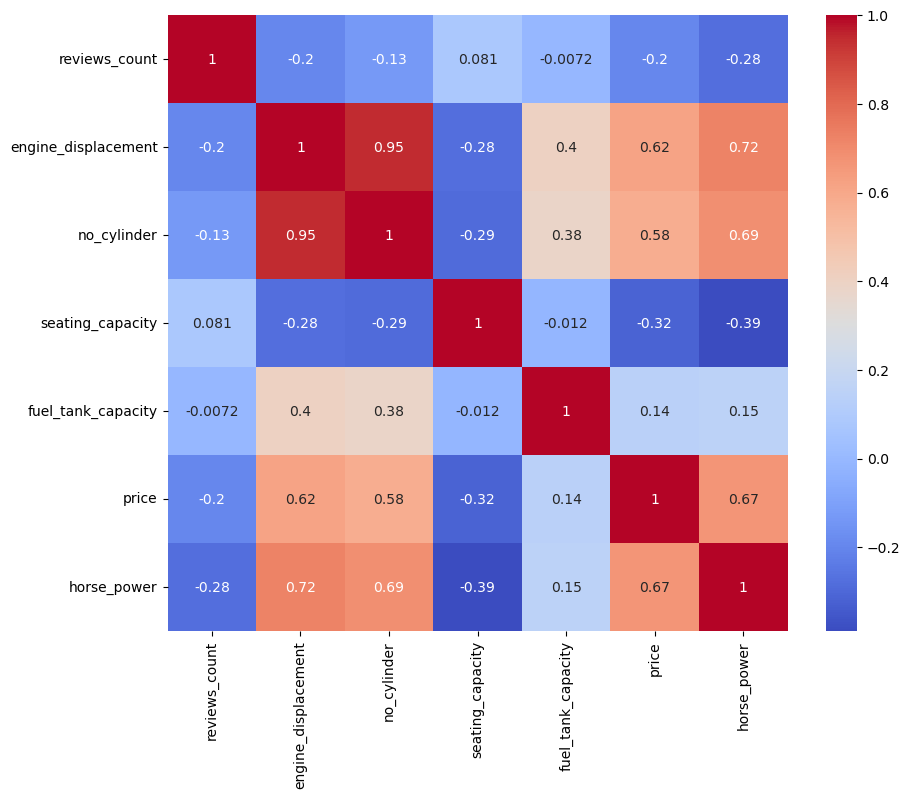

In [12]:
# Compute correlation matrix
corr = df_num.corr()
# set figure size
plt.figure(figsize=(10, 8))
# Generate heatmap
sns.heatmap(corr, cmap='coolwarm', annot=True)
# Show plot
plt.show()

In [13]:
mat_corr = df_num.corr()
mat_corr

,reviews_count,engine_displacement,no_cylinder,seating_capacity,fuel_tank_capacity,price,horse_power
reviews_count,1.000000,-0.198252,-0.131809,0.081222,-0.007201,-0.195834,-0.280433
engine_displacement,-0.198252,1.000000,0.948265,-0.277966,0.403735,0.619003,0.723541
no_cylinder,-0.131809,0.948265,1.000000,-0.289816,0.381565,0.578285,0.686595
seating_capacity,0.081222,-0.277966,-0.289816,1.000000,-0.012228,-0.315323,-0.389978
fuel_tank_capacity,-0.007201,0.403735,0.381565,-0.012228,1.000000,0.141525,0.150792
price,-0.195834,0.619003,0.578285,-0.315323,0.141525,1.000000,0.666462
horse_power,-0.280433,0.723541,0.686595,-0.389978,0.150792,0.666462,1.000000


In [14]:
eig_vals, eig_vecs = np.linalg.eig(corr)
eig_vals

array([3.47917264, 1.12417662, 0.92788697, 0.04677112, 0.70664291,
       0.273484  , 0.44186574])

In [33]:
eigval=np.sort(eig_vals)
valprop=eigval[::-1]
#print(valprop)
#print(eig_vecs)
inert=(valprop/7)*100
#print(inert)
cuminert=(np.cumsum(valprop)/7)*100

print(pd.DataFrame({'valprop':valprop,'inertie':inert,'inertiecum':cuminert, }))

    valprop    inertie  inertiecum
0  3.479173  49.702466   49.702466
1  1.124177  16.059666   65.762132
2  0.927887  13.255528   79.017660
3  0.706643  10.094899   89.112559
4  0.441866   6.312368   95.424927
5  0.273484   3.906914   99.331841
6  0.046771   0.668159  100.000000


In [34]:
#variance expliquée
print(acp.explained_variance_)
#proportion de variance expliquée
print(acp.explained_variance_ratio_)

[3.49639626 1.12974185 0.93248047 0.71014114 0.44405319 0.27483788
 0.04700266]
[0.49702466 0.16059666 0.13255528 0.10094899 0.06312368 0.03906914
 0.00668159]


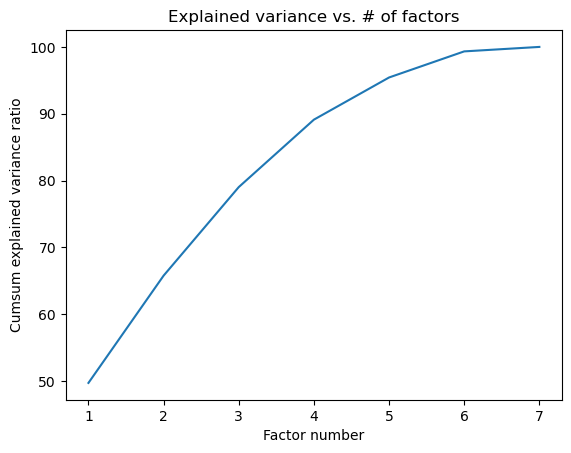

In [35]:
#cumul de variance expliquée
plt.plot(np.arange(1,p-2),cuminert)
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

<Axes: xlabel='explained_variance', ylabel='ACP'>

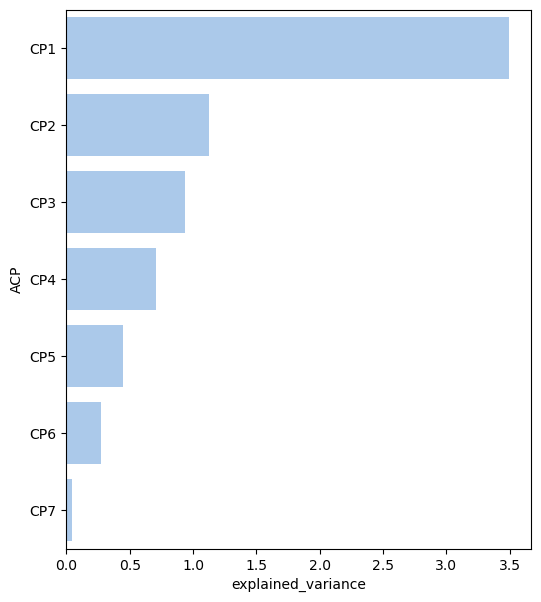

In [36]:
list_acp = ["CP1","CP2","CP3","CP4","CP5","CP6","CP7"]
df_acp = pd.DataFrame(list_acp, columns = ["ACP"])
df_acp['explained_variance'] = acp.explained_variance_
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 7))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="explained_variance", y="ACP", data=df_acp,
            label="Total", color="b")

In [37]:
print(acp.components_)

[[-0.15943101  0.49864729  0.48511704 -0.24451609  0.20941825  0.41731658
   0.46129909]
 [ 0.44543683  0.17984356  0.20179001  0.40921632  0.70145533 -0.1719687
  -0.19862605]
 [ 0.81806805 -0.03376524  0.03626458 -0.53730431 -0.1857437   0.06919676
   0.0180174 ]
 [ 0.29744384  0.12555457  0.13370954  0.6849526  -0.53945302  0.30364198
   0.15974009]
 [ 0.04694533 -0.32997966 -0.42219282  0.04678697  0.33565032  0.77183756
  -0.00891138]
 [ 0.12038473 -0.21511225 -0.28334068  0.110475    0.15760475 -0.3197143
   0.84834609]
 [ 0.04199134  0.73955614 -0.66799713 -0.02245333 -0.03307182 -0.03655879
  -0.04624747]]


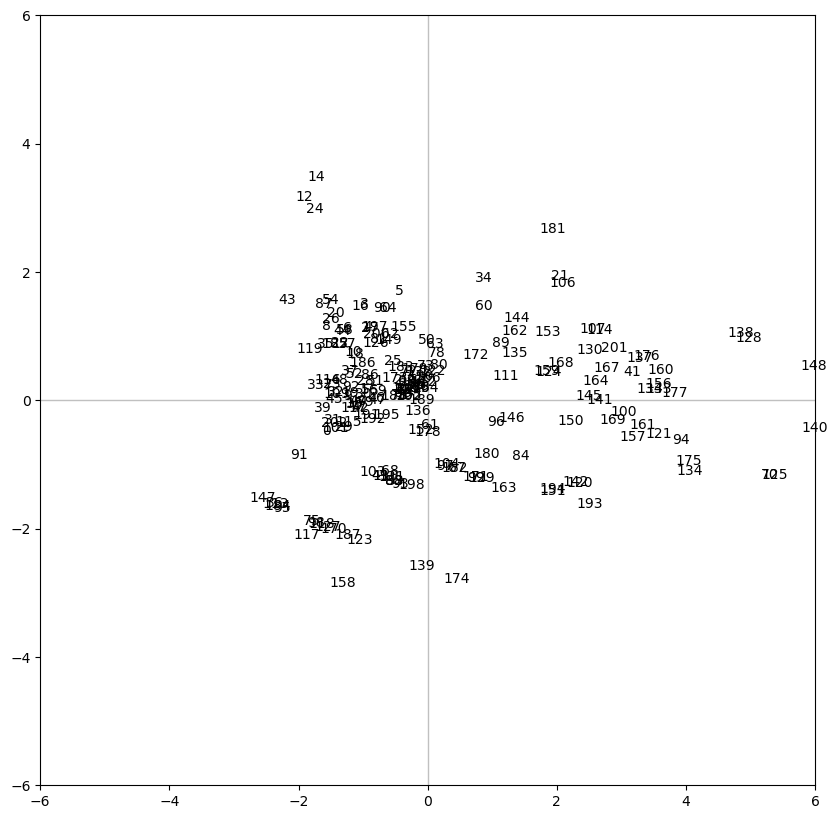

In [39]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(10,10))
axes.set_xlim(-6,6) #même limites en abscisse
axes.set_ylim(-6,6) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
 plt.annotate(df.index[i],(coord[i,0],coord[i,1]))
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

In [40]:
sqrt_eigval = np.sqrt(valprop)
corvar1=acp.components_[0,:] * sqrt_eigval[0]
print(corvar1)
corvar2=acp.components_[1,:] * sqrt_eigval[1]
print(corvar2)

[-0.29737933  0.93010387  0.90486652 -0.45608463  0.39061824  0.77840143
  0.86043998]
[ 0.47228417  0.19068308  0.21395229  0.43388059  0.74373341 -0.18233359
 -0.21059763]


In [41]:
#contribution des variables 
Ctrvar1=(corvar1**2)/(valprop[0])*100
Ctrvar2=(corvar2**2)/(valprop[1])*100
#qualité des variables 
Cosvar1=(corvar1**2)
Cosvar2=(corvar2**2)

print(pd.DataFrame({'ID':df_num.columns,'corvar1':corvar1,'corvar2':corvar2,'Ctrvar1':Ctrvar1,'Ctrvar2':Ctrvar2,'Cosvar1':Cosvar1,'Cosvar2':Cosvar2, }))

                    ID   corvar1   corvar2    Ctrvar1    Ctrvar2   Cosvar1  \
0        reviews_count -0.297379  0.472284   2.541825  19.841397  0.088434   
1  engine_displacement  0.930104  0.190683  24.864912   3.234371  0.865093   
2          no_cylinder  0.904867  0.213952  23.533854   4.071921  0.818783   
3     seating_capacity -0.456085  0.433881   5.978812  16.745800  0.208013   
4   fuel_tank_capacity  0.390618  0.743733   4.385600  49.203958  0.152583   
5                price  0.778401 -0.182334  17.415313   2.957323  0.605909   
6          horse_power  0.860440 -0.210598  21.279685   3.945231  0.740357   

    Cosvar2  
0  0.223052  
1  0.036360  
2  0.045776  
3  0.188252  
4  0.553139  
5  0.033246  
6  0.044351  


In [42]:
contributions = pd.DataFrame(acp.components_.T * np.sqrt(acp.explained_variance_), columns=['PC1', 'PC2', 'PC3','PC4','PC5','PC6','PC7'], index=df_num.columns)
qualites = pd.DataFrame(acp.transform(coord), columns=['PC1', 'PC2', 'PC3','PC4','PC5','PC6','PC7'], index=df.index)
import matplotlib.pyplot as plt
print(contributions)
print(qualites)

                          PC1       PC2       PC3       PC4       PC5  \
reviews_count       -0.298115  0.473452  0.789968  0.250656  0.031283   
engine_displacement  0.932403  0.191154 -0.032605  0.105805 -0.219890   
no_cylinder          0.907104  0.214481  0.035019  0.112677 -0.281338   
seating_capacity    -0.457212  0.434953 -0.518848  0.577209  0.031178   
fuel_tank_capacity   0.391584  0.745572 -0.179363 -0.454596  0.223668   
price                0.780326 -0.182784  0.066820  0.255879  0.514332   
horse_power          0.862567 -0.211118  0.017399  0.134613 -0.005938   

                          PC6       PC7  
reviews_count        0.063112  0.009104  
engine_displacement -0.112773  0.160336  
no_cylinder         -0.148541 -0.144822  
seating_capacity     0.057917 -0.004868  
fuel_tank_capacity   0.082624 -0.007170  
price               -0.167610 -0.007926  
horse_power          0.444745 -0.010026  
          PC1       PC2       PC3       PC4       PC5       PC6       PC7
0   -

<function matplotlib.pyplot.show(close=None, block=None)>

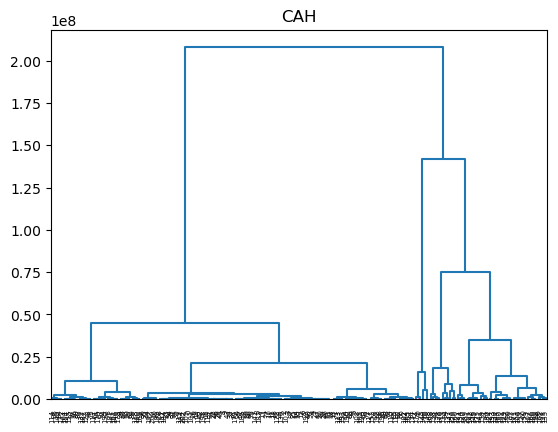

In [43]:
#librairies pour la CAH
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram , linkage, fcluster

#générer la matrice des liens
#Z = linkage(X,method='single',metric='euclidean') critère minimum
#Z = linkage(X,method='complete',metric='euclidean') critère maximum

Z = linkage(df_num,method='ward',metric='euclidean')
#print(Z)


#affichage du dendrogramme
plt.title("CAH")
#découpage à la hauteur 300 ==> identifiants de 4 groupes obtenus
dendrogram(Z,labels=df.index,color_threshold =300)
plt.show
